In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv(r"/content/IMDb Movies India.csv",encoding='latin1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

data.shape



(15509, 10)

In [ ]:
data.columns



Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
data.isna().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:

data.dropna(inplace=True)



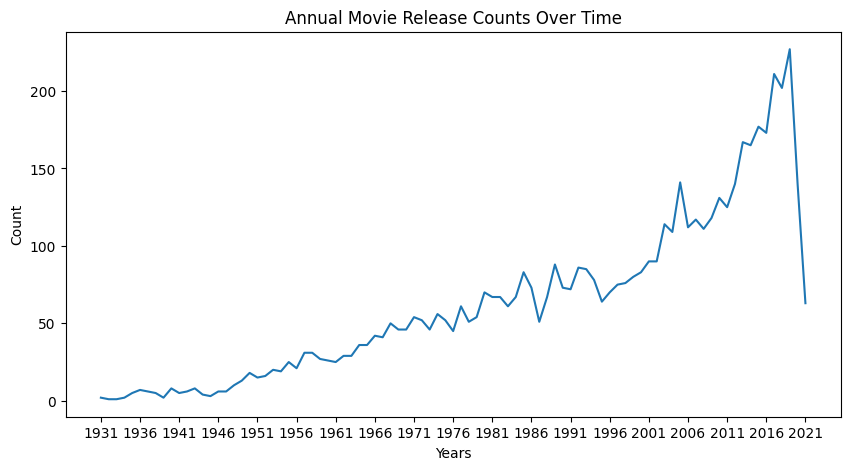

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data['Year'].value_counts().sort_index())
tick_positions = range(min(data['Year']),max(data['Year'])+1,5)
plt.title("Annual Movie Release Counts Over Time")
plt.xticks(tick_positions)
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()


In [ ]:
data['Year'].median()

2002.0

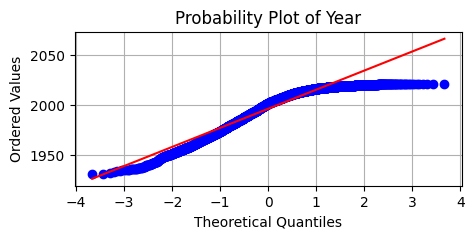

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(5,2))
stats.probplot(data['Year'],plot=plt)
plt.title('Probability Plot of Year')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

 Drama         1954
Drama          1842
Action         1652
 Romance       1221
Comedy          989
 Crime          604
 Thriller       590
 Family         364
 Comedy         355
 Musical        322
Crime           271
 Mystery        245
 Adventure      172
Romance         159
Horror          128
 Fantasy        115
Adventure       105
 History         91
Musical          90
Thriller         89
Biography        84
 Horror          74
Mystery          59
Family           52
 Music           50
Documentary      48
Animation        40
 Sport           38
 Action          34
 Biography       31
Fantasy          31
 War             30
 Sci-Fi          28
History           8
Sci-Fi            4
War               3
Music             3
Sport             2
 News             1
 Western          1
Name: count, dtype: int64


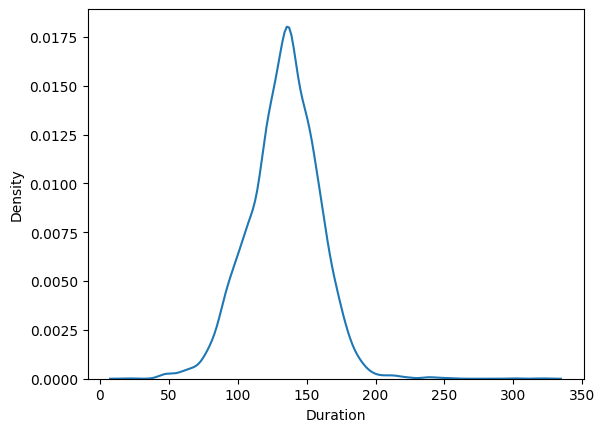

In [ ]:
sns.kdeplot(data['Duration'])


genre=data['Genre']
genre

generes=data['Genre'].str.split(',',expand=True)
generes


stack_data=generes.stack()
stack_data.dropna()
value_count=stack_data.value_counts()
print(value_count)

In [ ]:
import statsmodels.api as sm

x1_test=sm.add_constant(x_test)
reg=sm.OLS(y_test,x1_test)
model=reg.fit()
print(model.summary())


residual=model.resid
residual

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     28.70
Date:                Mon, 27 May 2024   Prob (F-statistic):           9.65e-23
Time:                        10:17:51   Log-Likelihood:                -1900.1
No. Observations:                1132   AIC:                             3810.
Df Residuals:                    1127   BIC:                             3835.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1827      4.228      9.032      0.0

10971    0.263479
14052   -3.351369
10002   -2.213587
3970    -1.839743
8840     1.653642
           ...   
13713    1.065019
2820     0.875551
1810    -0.868639
13679    0.738239
1649     0.171382
Length: 1132, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_test,y_test,test_size=0.2,random_state=42)


len(x_train),len(x_test),len(y_train),len(y_test)


lr=LinearRegression()
lr.fit(x_train,y_train)

y_predict=lr.predict(x_test)
y_predict


y_test


4305     7.7
2059     7.0
13073    6.2
7064     6.0
9565     3.3
        ... 
12495    6.2
5797     5.5
14250    5.9
1431     7.3
14452    2.4
Name: Rating, Length: 227, dtype: float64